In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

In [34]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline

# # Load the image
# image1 = cv2.imread('./images/face1.jpeg')

# # Convert the training image to RGB
# training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# # Convert the training image to gray scale
# training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# # Create test image by adding Scale Invariance and Rotational Invariance
# test_image = cv2.pyrDown(training_image)
# test_image = cv2.pyrDown(test_image)
# num_rows, num_cols = test_image.shape[:2]

# rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
# test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

# test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# # Display traning image and testing image
# fx, plots = plt.subplots(1, 2, figsize=(20,10))

# plots[0].set_title("Training Image")
# plots[0].imshow(training_image)

# plots[1].set_title("Testing Image")
# plots[1].imshow(test_image)

In [35]:
def read(img):
    img = cv.imread(img)
    imgGray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    return img, imgGray

In [36]:
def threshHolding(img):
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    return images

In [37]:
def view(images):
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

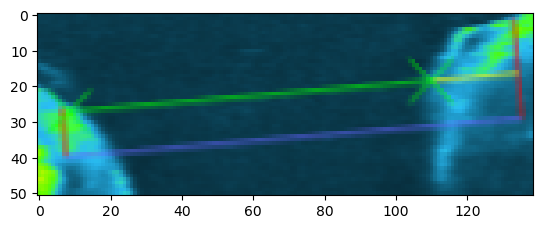

In [38]:

img = cv.imread('2.png')
training_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(training_image)
# plt.imshow(img)

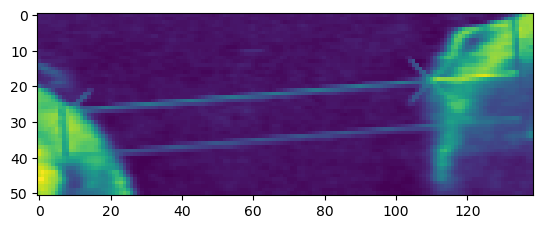

In [39]:
training_gray = cv.cvtColor(training_image, cv.COLOR_RGB2GRAY)
plt.imshow(training_gray)

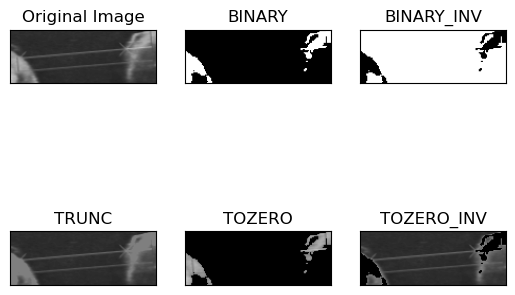

In [40]:
imgs = threshHolding(training_gray)
view(imgs)

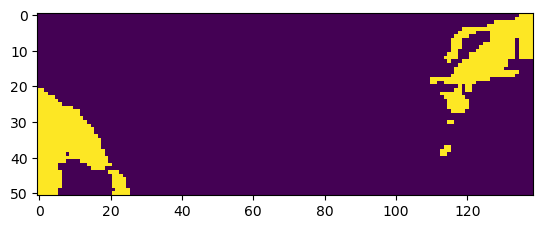

In [41]:
plt.imshow(imgs[1])

In [42]:
cv.imwrite('mask2.png',imgs[1])

True

True

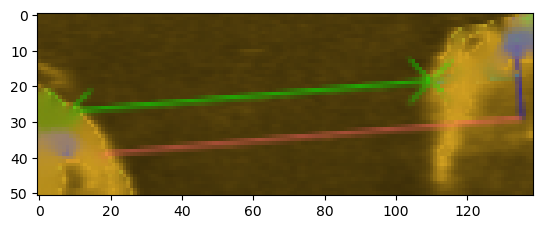

In [43]:
mask = cv.imread('mask2.png', 0)
dst = cv.inpaint(img, mask, 3, cv.INPAINT_TELEA)
plt.imshow(dst)
cv.imwrite('removed.jpg', dst)

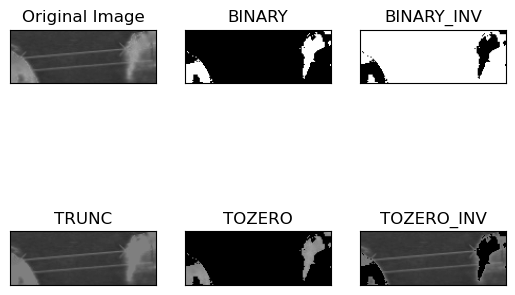

In [44]:
img1 ,grayImg1 = read('removed.jpg')
imgs1 = threshHolding(grayImg1)
view(imgs1)

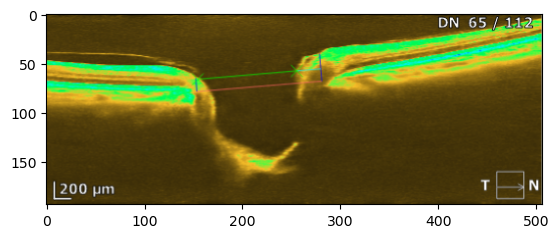

In [45]:
img2, grayImg2 = read('1.png')
plt.imshow(img2)

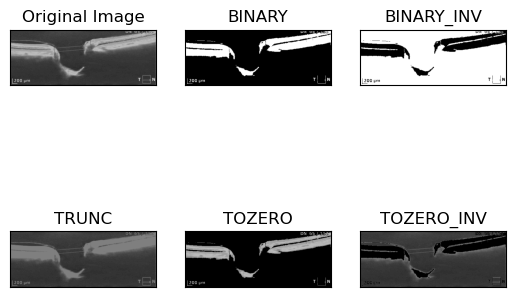

In [46]:
imgs2 = threshHolding(grayImg2)
view(imgs2)

In [47]:
mean,std = cv.meanStdDev(grayImg2) 
low_thresh = mean - (std*1)
print('mean=',mean,'\nstd=',std,'\nth=',low_thresh[0])

mean= [[81.05242075]] 
std= [[44.58865517]] 
th= [36.46376558]


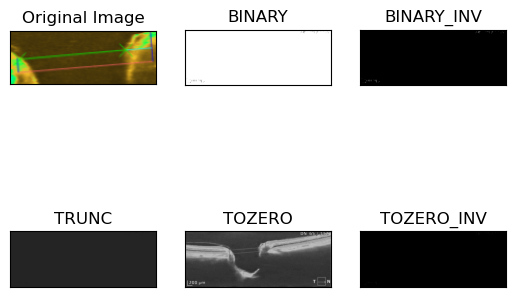

In [48]:
# assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(grayImg2,int(low_thresh[0]),255,cv.THRESH_BINARY) # 127
ret,thresh2 = cv.threshold(grayImg2,int(low_thresh[0]),255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(grayImg2,int(low_thresh[0]),255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(grayImg2,int(low_thresh[0]),255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(grayImg2,int(low_thresh[0]),255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
 
plt.show()

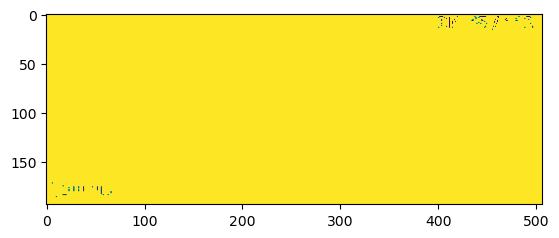

In [49]:
plt.imshow(thresh1)

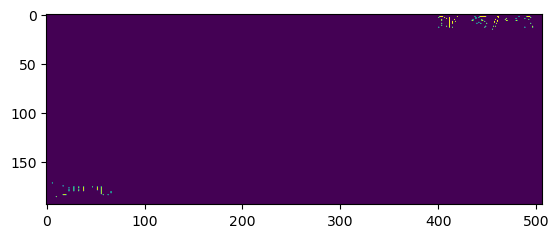

In [50]:
plt.imshow(thresh2)

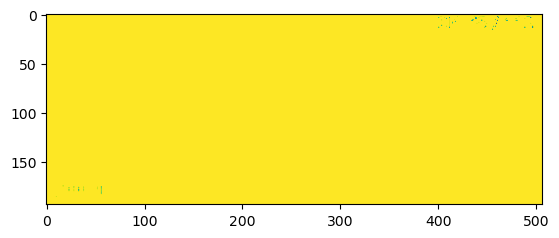

In [51]:
plt.imshow(thresh3)

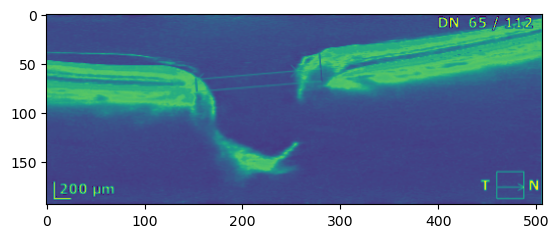

In [52]:
plt.imshow(thresh4)

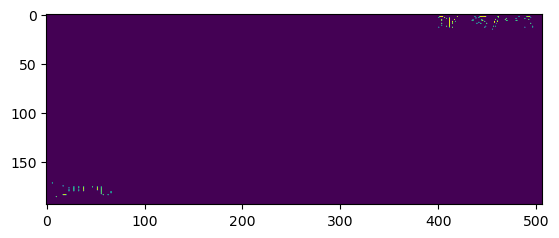

In [53]:
plt.imshow(thresh5)

True

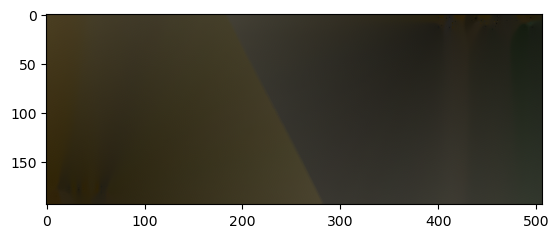

In [54]:
dst = cv.inpaint(img2, thresh1, 3, cv.INPAINT_TELEA)
plt.imshow(dst)
cv.imwrite('removed.jpg', dst)

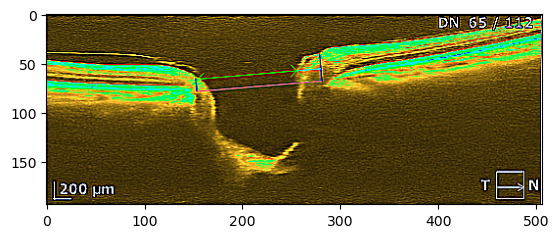

In [55]:
img ,gray = read('sharp.png')
plt.imshow(img)

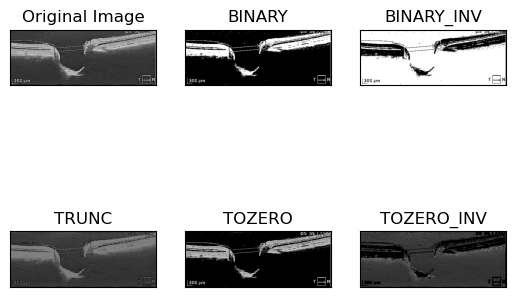

In [57]:
imgs = threshHolding(gray)
view(imgs)

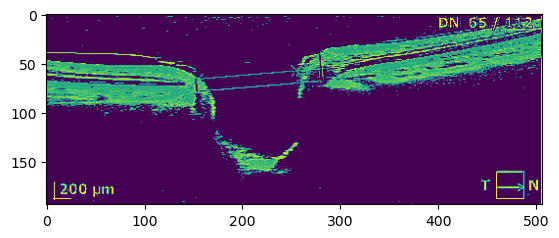

In [58]:
plt.imshow(imgs[4])